In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#OpenWeather Key
api_key = weather_api
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
#Empty lists for my variables
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
city_column = []

count = 0
sets = 1

In [5]:
#Run the API call for each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if count < 50:
            count += 1
    else:
            sets += 1
            count = 0
    print(f"Processing Record {count} of Set {sets} | {city}")
    try:
        weather_json = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        wind_speed.append(weather_json['wind']['speed'])
        city_column.append(city)
    except:
        print('City not found. Skipping...')
    pass
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | englewood
Processing Record 9 of Set 1 | acapulco
Processing Record 10 of Set 1 | narrabri
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | chikhli
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | tangjiazhuang
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | nizhniy kuranakh
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | ugoofaaru
Processing Record 22 of Set 1 | hua

Processing Record 33 of Set 4 | nigde
Processing Record 34 of Set 4 | haibowan
City not found. Skipping...
Processing Record 35 of Set 4 | nola
Processing Record 36 of Set 4 | general roca
City not found. Skipping...
Processing Record 37 of Set 4 | krestena
Processing Record 38 of Set 4 | hennigsdorf
Processing Record 39 of Set 4 | hervey bay
Processing Record 40 of Set 4 | lata
Processing Record 41 of Set 4 | urumqi
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | vught
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | mont-de-marsan
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | pafos
Processing Record 48 of Set 4 | surt
Processing Record 49 of Set 4 | barawe
City not found. Skipping...
Processing Record 50 of Set 4 | portland
Processing Record 0 of Set 5 | pisco
Processing Record 1 of Set 5 | wanning
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processi

Processing Record 17 of Set 8 | buraydah
Processing Record 18 of Set 8 | cangucu
Processing Record 19 of Set 8 | gambo
Processing Record 20 of Set 8 | santana do livramento
Processing Record 21 of Set 8 | sawakin
Processing Record 22 of Set 8 | bridlington
Processing Record 23 of Set 8 | kurchum
Processing Record 24 of Set 8 | rudnaya pristan
City not found. Skipping...
Processing Record 25 of Set 8 | bonga
Processing Record 26 of Set 8 | wajima
Processing Record 27 of Set 8 | tilichiki
Processing Record 28 of Set 8 | mergui
City not found. Skipping...
Processing Record 29 of Set 8 | skelleftea
Processing Record 30 of Set 8 | luang prabang
City not found. Skipping...
Processing Record 31 of Set 8 | maltahohe
Processing Record 32 of Set 8 | disna
Processing Record 33 of Set 8 | los llanos de aridane
City not found. Skipping...
Processing Record 34 of Set 8 | manaus
Processing Record 35 of Set 8 | chuy
Processing Record 36 of Set 8 | berlevag
Processing Record 37 of Set 8 | kharitonovo
P

Processing Record 49 of Set 11 | vila franca do campo
Processing Record 50 of Set 11 | yumen
Processing Record 0 of Set 12 | chunskiy
Processing Record 1 of Set 12 | torit
Processing Record 2 of Set 12 | ixtapa
Processing Record 3 of Set 12 | kavaratti
Processing Record 4 of Set 12 | mrirt
City not found. Skipping...
Processing Record 5 of Set 12 | orange walk
Processing Record 6 of Set 12 | mpika
Processing Record 7 of Set 12 | nishihara
Processing Record 8 of Set 12 | puri
Processing Record 9 of Set 12 | paradwip
City not found. Skipping...
Processing Record 10 of Set 12 | belfast
Processing Record 11 of Set 12 | nemuro
Processing Record 12 of Set 12 | ilhabela
Processing Record 13 of Set 12 | morro bay
Processing Record 14 of Set 12 | paamiut
Processing Record 15 of Set 12 | lokosovo
Processing Record 16 of Set 12 | atar
Processing Record 17 of Set 12 | lagoa
Processing Record 18 of Set 12 | januaria
Processing Record 19 of Set 12 | san patricio
Processing Record 20 of Set 12 | naka

In [6]:
#create new dataframe using new columns
cities_dict={"City":city_column,
             "Cloudiness":cloudiness,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":lat,
             "Longitude":lng,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

In [7]:
weather_df = pd.DataFrame(cities_dict)
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,100,PF,1596080409,87,-23.12,-134.97,72.75,13.87
1,busselton,96,AU,1596080411,77,-33.65,115.33,61.00,5.01
2,jamestown,90,US,1596080191,93,42.10,-79.24,66.99,9.17
3,broome,20,US,1596080140,93,42.25,-75.83,68.00,4.70
4,nikolskoye,2,RU,1596080427,87,59.70,30.79,60.01,6.71


In [13]:
weather_df.to_csv("../output_data/weather_csv")

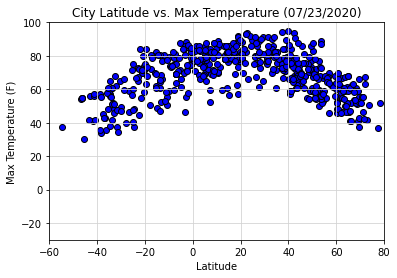

In [14]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,80)
plt.ylim(-30,100)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

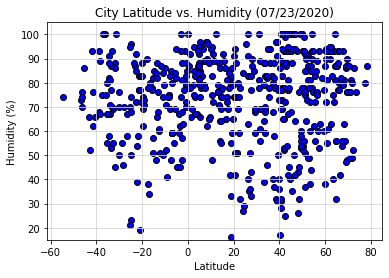

In [15]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

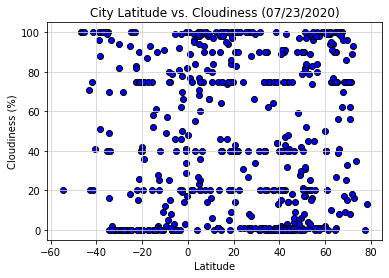

In [16]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

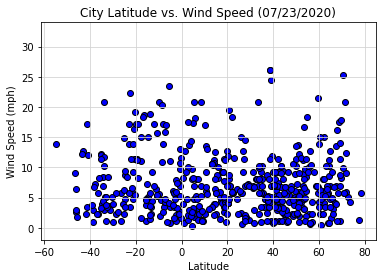

In [17]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

In [18]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [19]:
north_df = weather_df.loc[weather_df["Latitude"] >= 0,:]
south_df = weather_df.loc[weather_df["Latitude"] < 0,:]

#south_df

The r-squared is: -0.6447131017587815


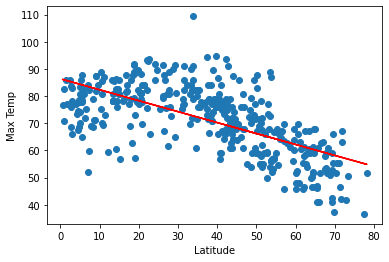

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,30))
plt.savefig("Figures/fig5.png")

The r-squared is: 0.6811824613225885


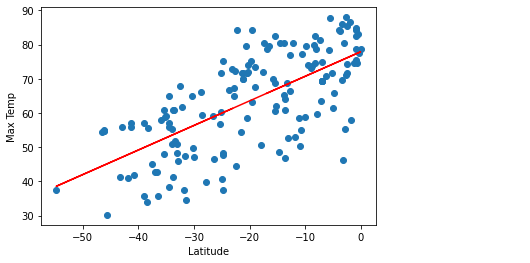

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,30))
plt.savefig("Figures/fig6.png")

The r-squared is: -0.04405077638786569


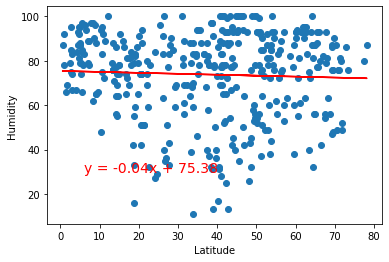

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))
plt.savefig("Figures/fig7.png")

The r-squared is: -0.02263250225721894


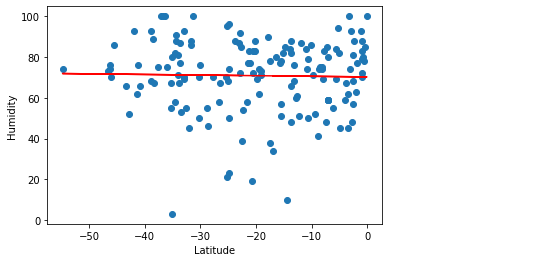

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))
plt.savefig("Figures/fig8.png")

The r-squared is: -0.09910353630008642


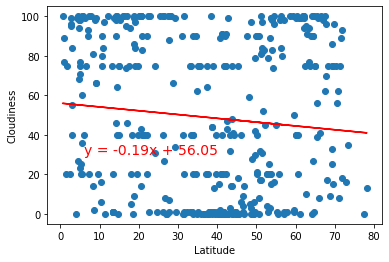

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))
plt.savefig("Figures/fig9.png")

The r-squared is: -0.20613470538103648


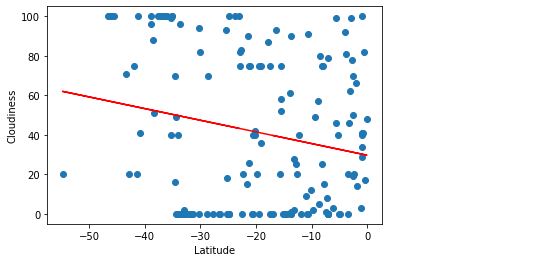

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(6,30))
plt.savefig("Figures/fig10.png")

The r-squared is: 0.02256659883158517


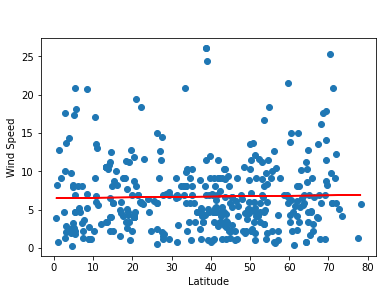

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))
plt.savefig("Figures/fig11.png")

The r-squared is: 0.02190025478777254


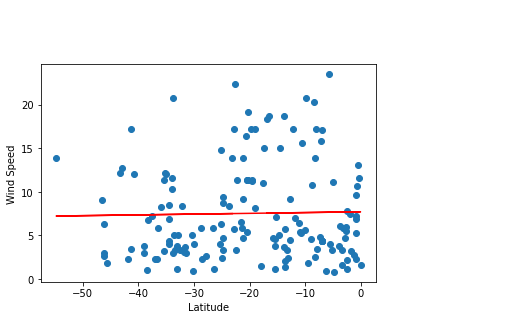

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,30))
plt.savefig("Figures/fig12.png")